In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cmocean 
import pickle

plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16

data_names =  ['Number of bison', 'Number of grass patches', 'Average altruism', 'SD altruism']
colors = ['saddlebrown', 'green', 'orange', 'moccasin', 'purple']
colormaps = [cmocean.cm.turbid, 'Greens', 'RdYlGn', None, 'RdPu']
timestep_str = 'Timesteps'

Colors from: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

Colormaps from: https://matplotlib.org/tutorials/colors/colormaps.html

Bison colormap from: https://matplotlib.org/cmocean/

In [67]:
def create_test_data():
    n_grass = np.random.randint(0,100, (1,1000))[0]
    n_bison = np.random.randint(0,80, (1,1000))[0]
    avg_alt = np.random.rand(1000)
    alt_sd = np.random.rand(1000) / 4
    test_data = pd.DataFrame([n_bison, n_grass, avg_alt, alt_sd], data_names).T
    return test_data

def import_data(exp_name):
    param_pickle = 'data/' + exp_name + '_parameters.pickle'
    results_pickle = 'data/' + exp_name + '_results.pickle'

    params = pickle.load(open(param_pickle, "rb" ))
    results = pd.read_pickle(results_pickle)
    return params, results

def create_title_str(params_exp, data_names, exp_num, v, t0, t1):
    variable_str = data_names[v-1]
    if v == 3:
        variable_str += f' $\pm$ STD'
    title_str = f'{variable_str} Run {exp_num} T({t0}-{t1})'
    return title_str

def plot_line(params, results, exp_num, v, t0=0, t1=False, save_fig=False):
    """
    Plot the results in a lineplot of a single run
        results: Pandas DataFrame with multindex 
        exp_num: int ID for the selected run
        v: variable to plot[1=Bisons, 2=Grass, 3=Average ALtruism]
        t0: start_timestep
        t1: end_timestep
        save_fig: str for name
    """ 
    exp_data = results.loc[exp_num]
    data_names = exp_data.columns

    if not(t1):
        t1 = len(exp_data) - 1
    
    if v in [1, 2, 5]:
        plt.plot(exp_data[data_names[v-1]].loc[t0:t1], color=colors[v-1])
    if v==3: 
        x = np.arange(t0, t1+1)
        y = exp_data[data_names[v-1]].loc[t0:t1]
        error = exp_data[data_names[v]].loc[t0:t1]
        plt.plot(y, color=colors[v-1])
        plt.fill_between(x, y-error, y+error, color=colors[v])
    
    params_exp = params.loc[exp_num]
    title_str = create_title_str(params_exp, data_names, exp_num, v, t0, t1)
    
    plt.title(title_str)
    plt.xlabel(timestep_str)
    plt.ylabel(data_names[v-1])
    plt.grid()
    plt.tight_layout()
    if save_fig:
        plt.savefig(f'Plots\{save_fig}.png')
    plt.show()

def pick_colormap(vc):
    if not(vc in [1, 2, 3, 5]):       
        colormap = 'Greys'
    else:
        colormap = colormaps[vc-1]
    return colormap

def plot_scatter_per_run(params, results, exp_num, vx, vy, vc, t0=0, t1=False, save_fig=False):
    """
    Plot the results of a single run in a scatterplot 
    Input variables
        results: Pandas DataFrame with multindex 
        exp_num: int ID for the selected run
        v: variable to plot[1=Bisons, 2=Grass, 3=Average ALtruism]
        t0: start_timestep
        t1: end_timestep
        save_fig: str for name
    """ 
    exp_data = results.loc[exp_num]
    data_names = exp_data.columns
    colormap = pick_colormap(vc)

    if not(t1):
        t1 = len(exp_data) - 1
    
    x = exp_data[data_names[vx-1]].loc[t0:t1]
    y = exp_data[data_names[vy-1]].loc[t0:t1]
    c = exp_data[data_names[vc-1]].loc[t0:t1]

    plt.grid()
    plt.scatter(x, y, c=c, cmap=colormap, zorder=10)
    plt.xlabel(data_names[vx-1])
    plt.ylabel(data_names[vy-1])
    cbar = plt.colorbar()
    cbar.set_label(data_names[vc-1])
    
    params_exp = params.loc[exp_num]
    title_str = create_title_str(params_exp, data_names, exp_num, vy, t0, t1)
    var_str = f'{data_names[vy-1]} vs. {data_names[vx-1]}'
    plt.title(title_str)

    plt.tight_layout()
    if save_fig:
        plt.savefig(f'Plots\{save_fig}.png')
    plt.show()
    
def plot_scatter_avg(params, avg_per_run, vx, vy, vc, save_fig=False, title=False):
    """
    Plot the results of a single run in a scatterplot 
    Input variables
        results: Pandas DataFrame with multindex 
        exp_num: int ID for the selected run
        v: variable to plot[1=Bisons, 2=Grass, 3=Average ALtruism, 5=Battles]
        t0: start_timestep
        t1: end_timestep
        save_fig: str for name
    """ 
    colormap = pick_colormap(vc)

    x = avg_per_run[data_names[vx-1]]
    y = avg_per_run[data_names[vy-1]]
    c = avg_per_run[data_names[vc-1]]

    plt.grid()
    plt.scatter(x, y, c=c, cmap=colormap, zorder=10)
    if title:
        plt.title(title)
    plt.xlabel(data_names[vx-1])
    plt.ylabel(data_names[vy-1])
    cbar = plt.colorbar()
    cbar.set_label(data_names[vc-1])
    plt.tight_layout()
    if save_fig:
        plt.savefig(f'Plots\{save_fig}.png')
    plt.show()
    
def create_avg_per_param(avg_per_run, variable_params):
    avg_per_param = avg_per_run.groupby(variable_params, as_index=False).mean()
    for param in variable_params:
        avg_per_param[param+'_temp'] = avg_per_param[param]
        avg_per_param = avg_per_param.drop(labels=param, axis=1)
    dict_remapper = {}
    for param in variable_params:
        dict_remapper[param+'_temp'] = param 
    avg_per_param = avg_per_param.rename(dict_remapper, axis=1)
    return avg_per_param

def variable_params_func(params):
    index_run = np.where(np.array(params.columns) == 'Run')[0][0]
    return list(np.array(params.columns)[:index_run])

### IMPORT DATA

In [33]:
exp_name = 'final_experiment_with_sight'
params, results = import_data(exp_name)
variable_params = variable_params_func(params)
empty_results = results[results['Bison'] == 0]
non_empty_results = results[results['Bison'] != 0]

print('total: ', results.shape)
print('Empty: ', empty_results.shape)
print(f'Percentage empty: {empty_results.shape[0]/results.shape[0]*100:.2f}')
print(f'Percentage non-empty: {non_empty_results.shape[0]/results.shape[0]*100:.2f}')
results=non_empty_results

total:  (5410800, 5)
Empty:  (109061, 5)
Percentage empty: 2.02
Percentage non-empty: 97.98


In [22]:
print(f'Number of experiments: {params.shape[0]}')

Number of experiments: 10800


### CREATE GRAPHS PER RUN

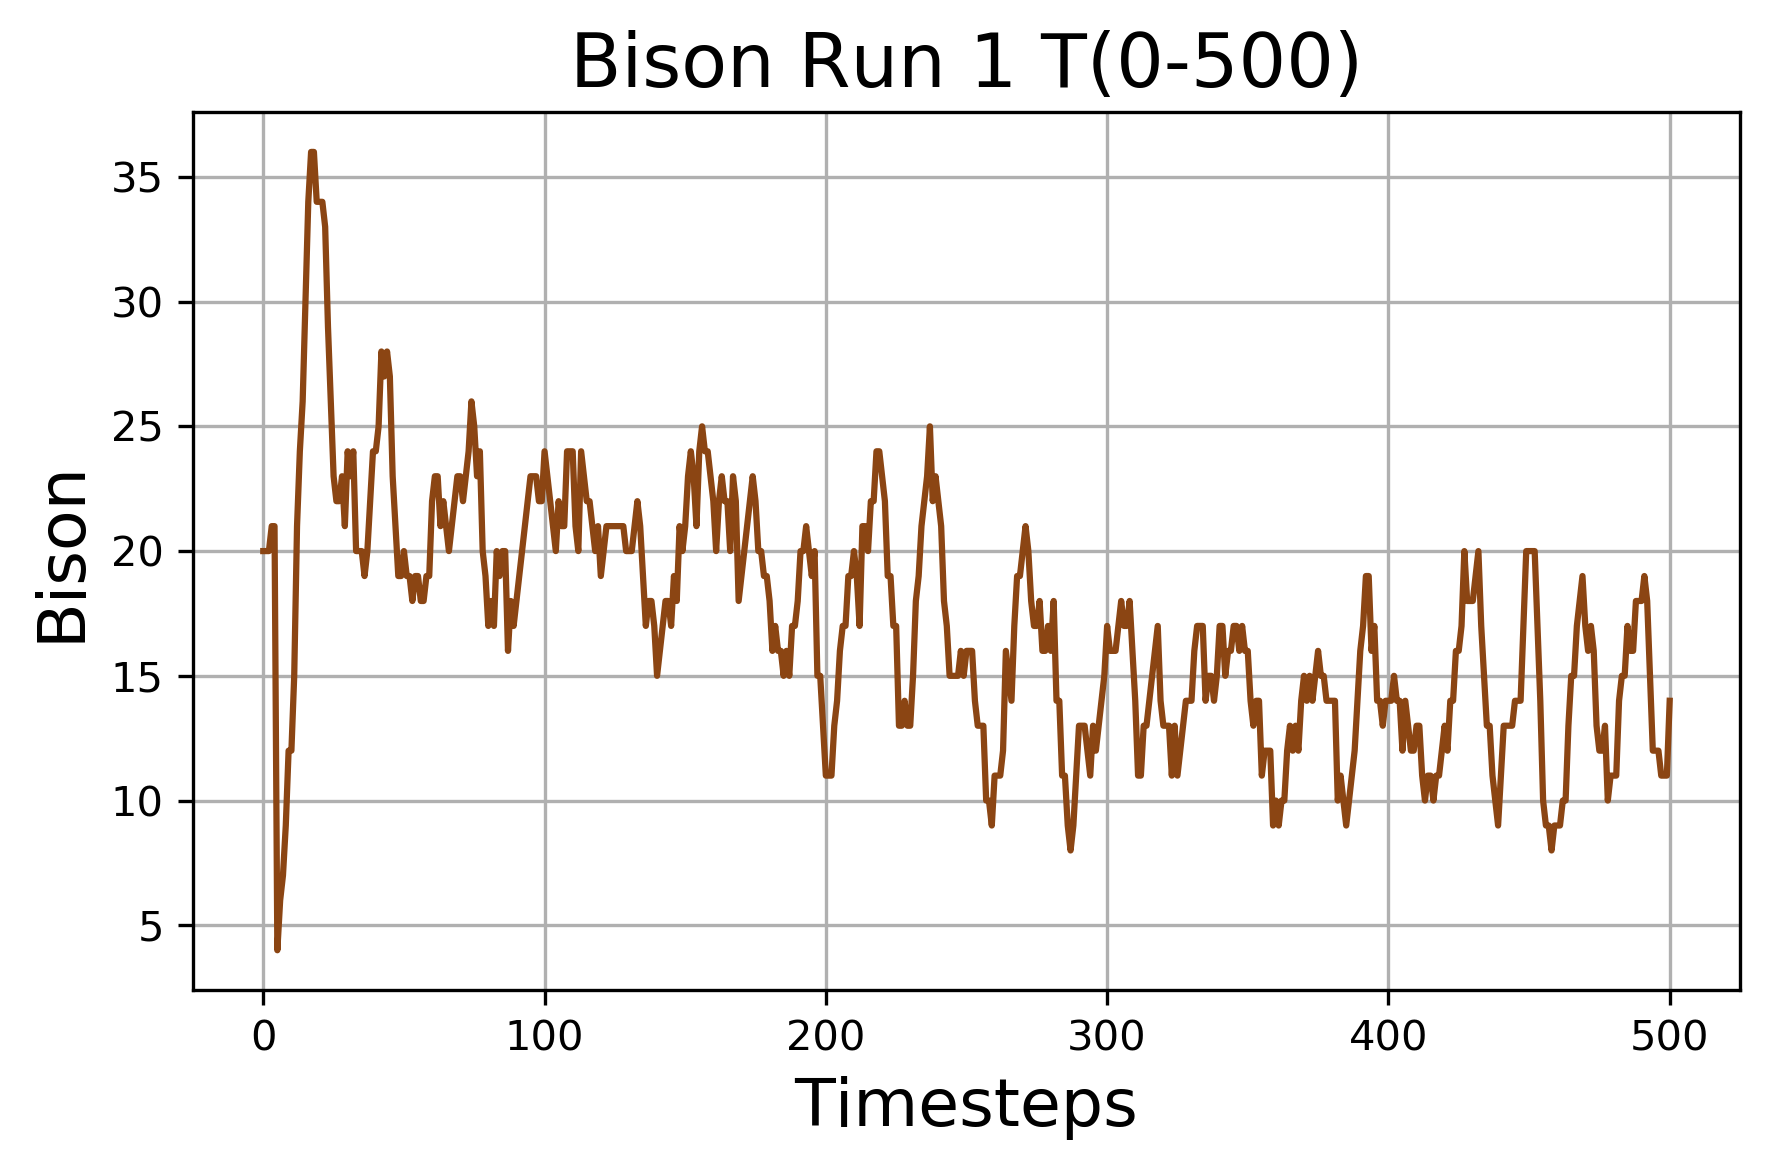

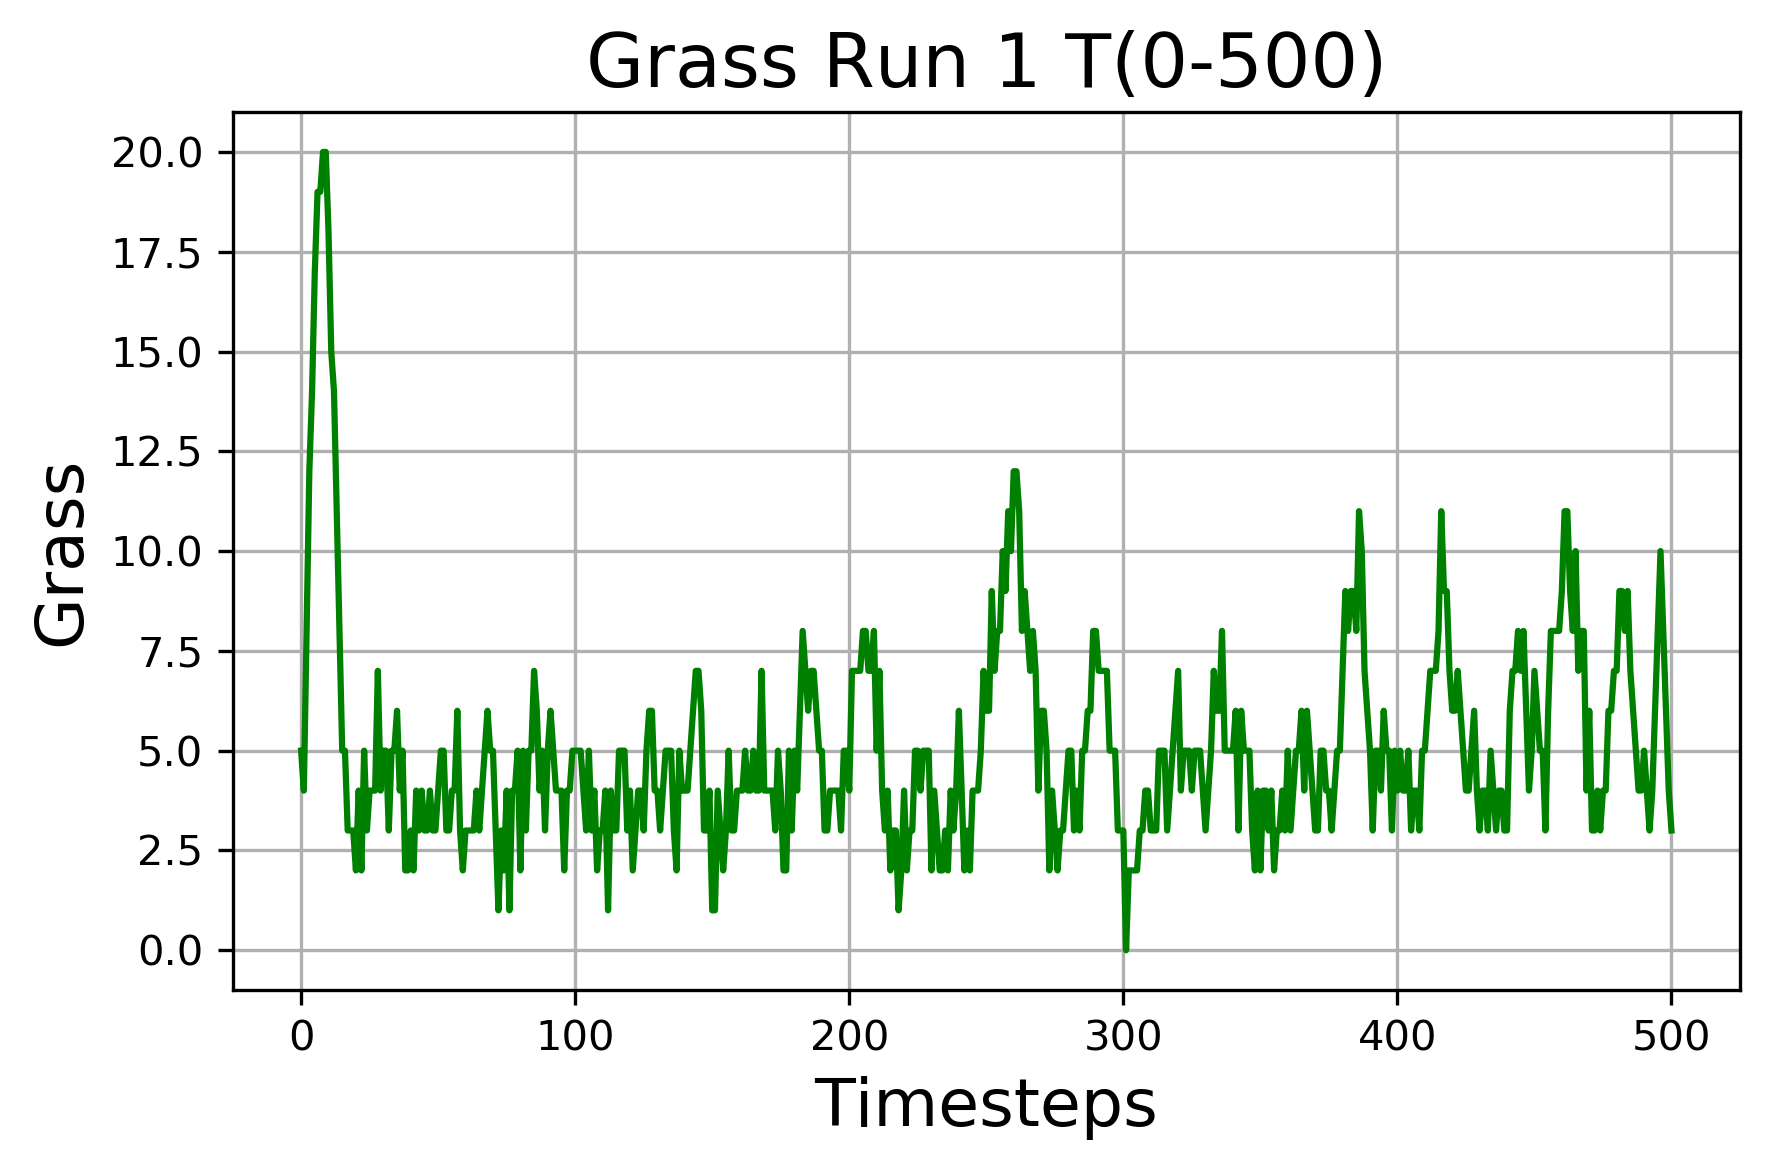

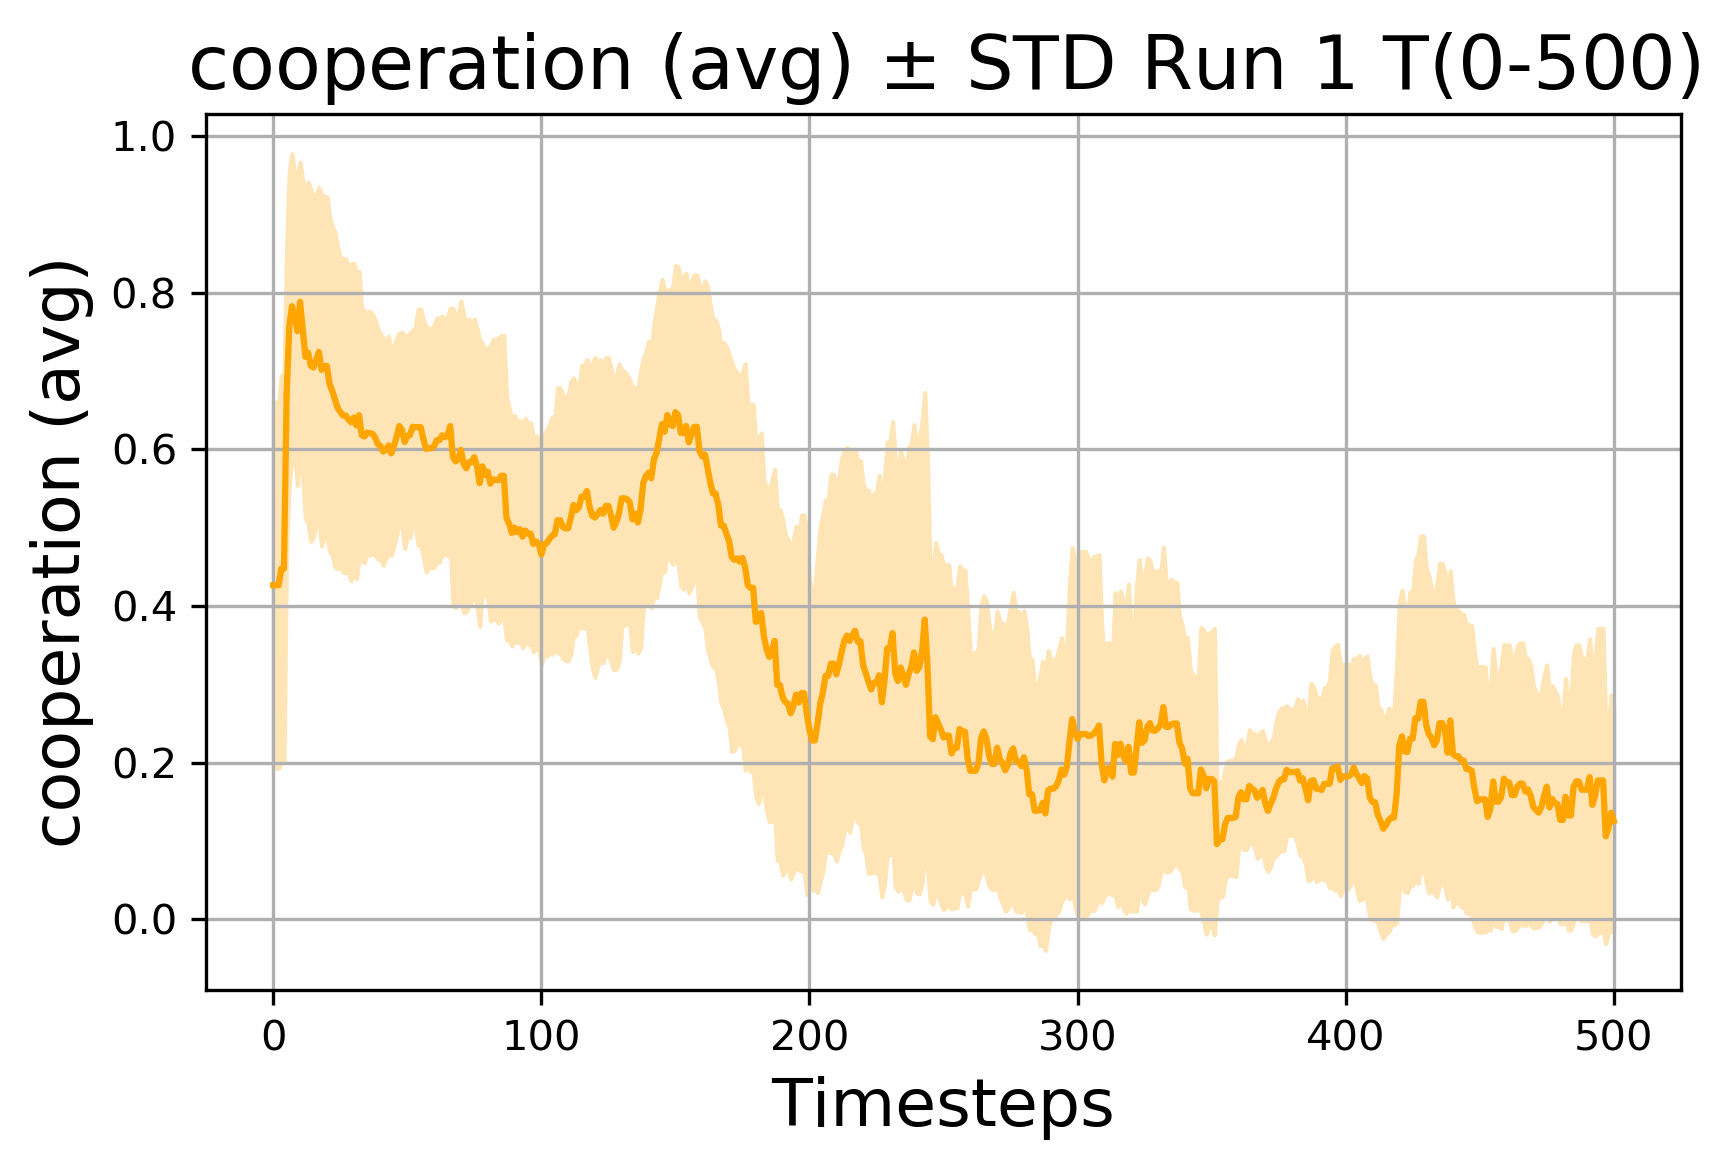

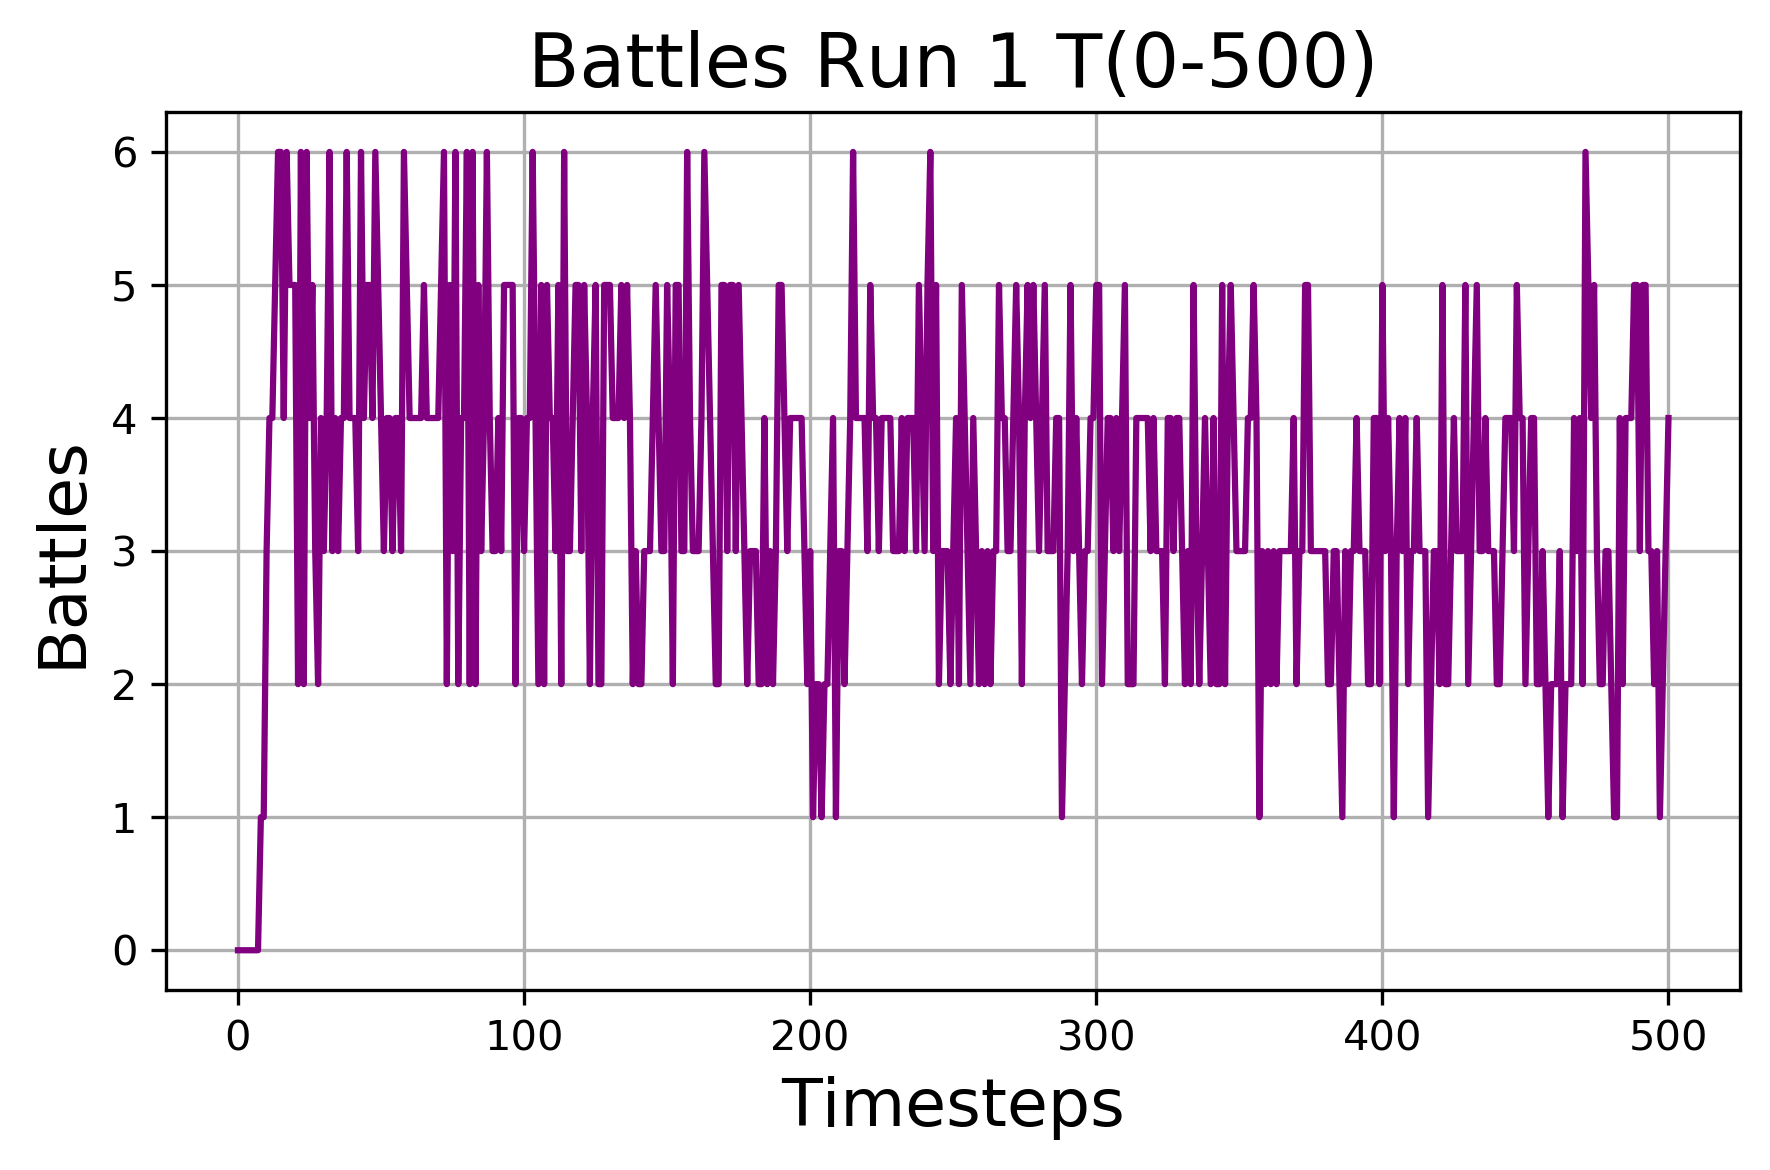

In [25]:
exp_num = 1
t0 = 0
t1 = False
plot_line(params, results, exp_num=exp_num, v=1, t0=t0, t1=t1, save_fig=False)
plot_line(params, results, exp_num=exp_num, v=2, t0=t0, t1=t1, save_fig=False)
plot_line(params, results, exp_num=exp_num, v=3, t0=t0, t1=t1, save_fig=False)
plot_line(params, results, exp_num=exp_num, v=5, t0=t0, t1=t1, save_fig=False)

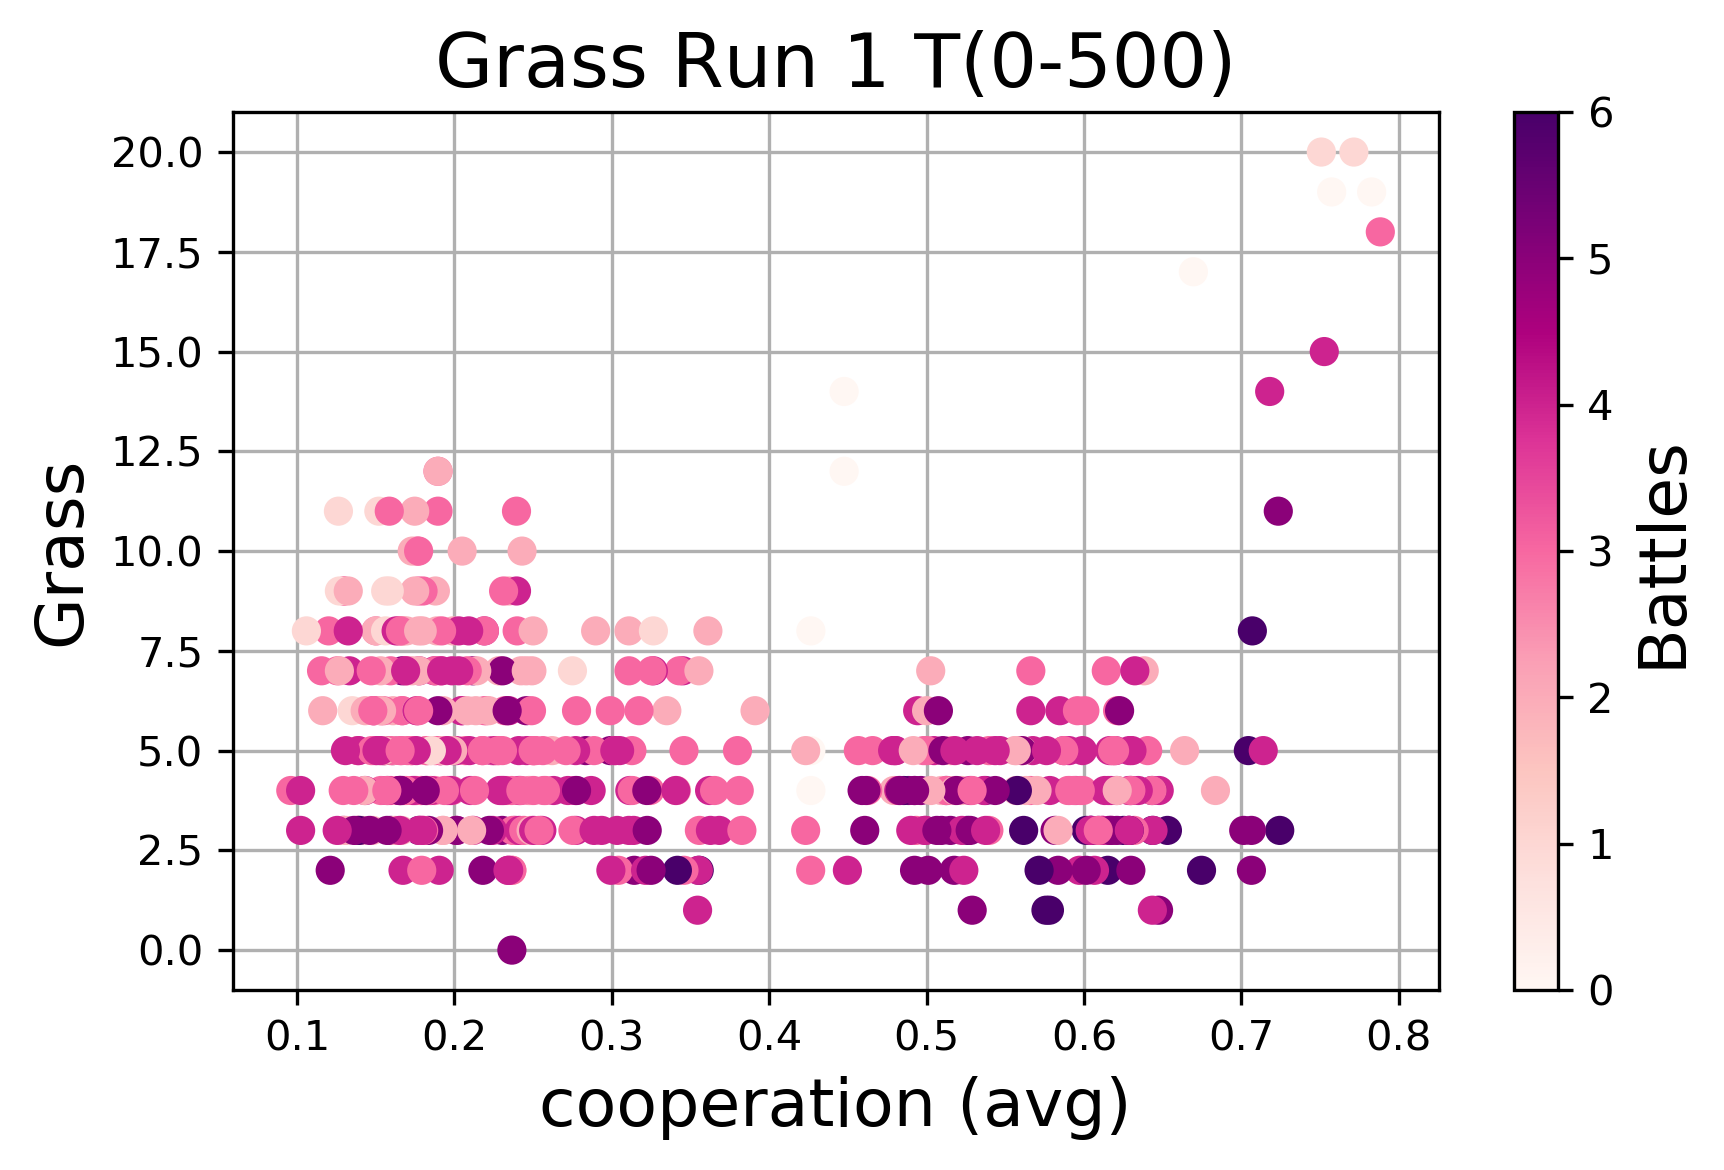

In [26]:
plot_scatter_per_run(params, results, exp_num=exp_num,
                        vx=3, vy=2, vc=5, t0=0, t1=False, save_fig=False)

## AVERAGES

In [34]:
avg_per_run = results.mean(axis=0, level=0)
for param in variable_params:
    avg_per_run[param] = params[param]
avg_per_run.head()

,Bison,Grass,cooperation (avg),cooperation (std),Battles,sight,grass_spread,movement_weight_fights
0,20.000000,11.000000,0.478679,0.259401,0.000000,1,0.5,0.0
1,17.157685,5.061876,0.342973,0.178218,3.419162,1,0.5,0.0
2,20.000000,11.000000,0.644581,0.199521,0.000000,1,0.5,0.0
3,16.640719,5.161677,0.306575,0.144111,3.451098,1,0.5,0.0
4,16.592814,6.688623,0.314123,0.155467,3.451098,1,0.5,0.0


In [35]:
list(zip(avg_per_run.columns, range(1, len(avg_per_run.columns)+1)))

[('Bison', 1),
 ('Grass', 2),
 ('cooperation (avg)', 3),
 ('cooperation (std)', 4),
 ('Battles', 5),
 ('sight', 6),
 ('grass_spread', 7),
 ('movement_weight_fights', 8)]

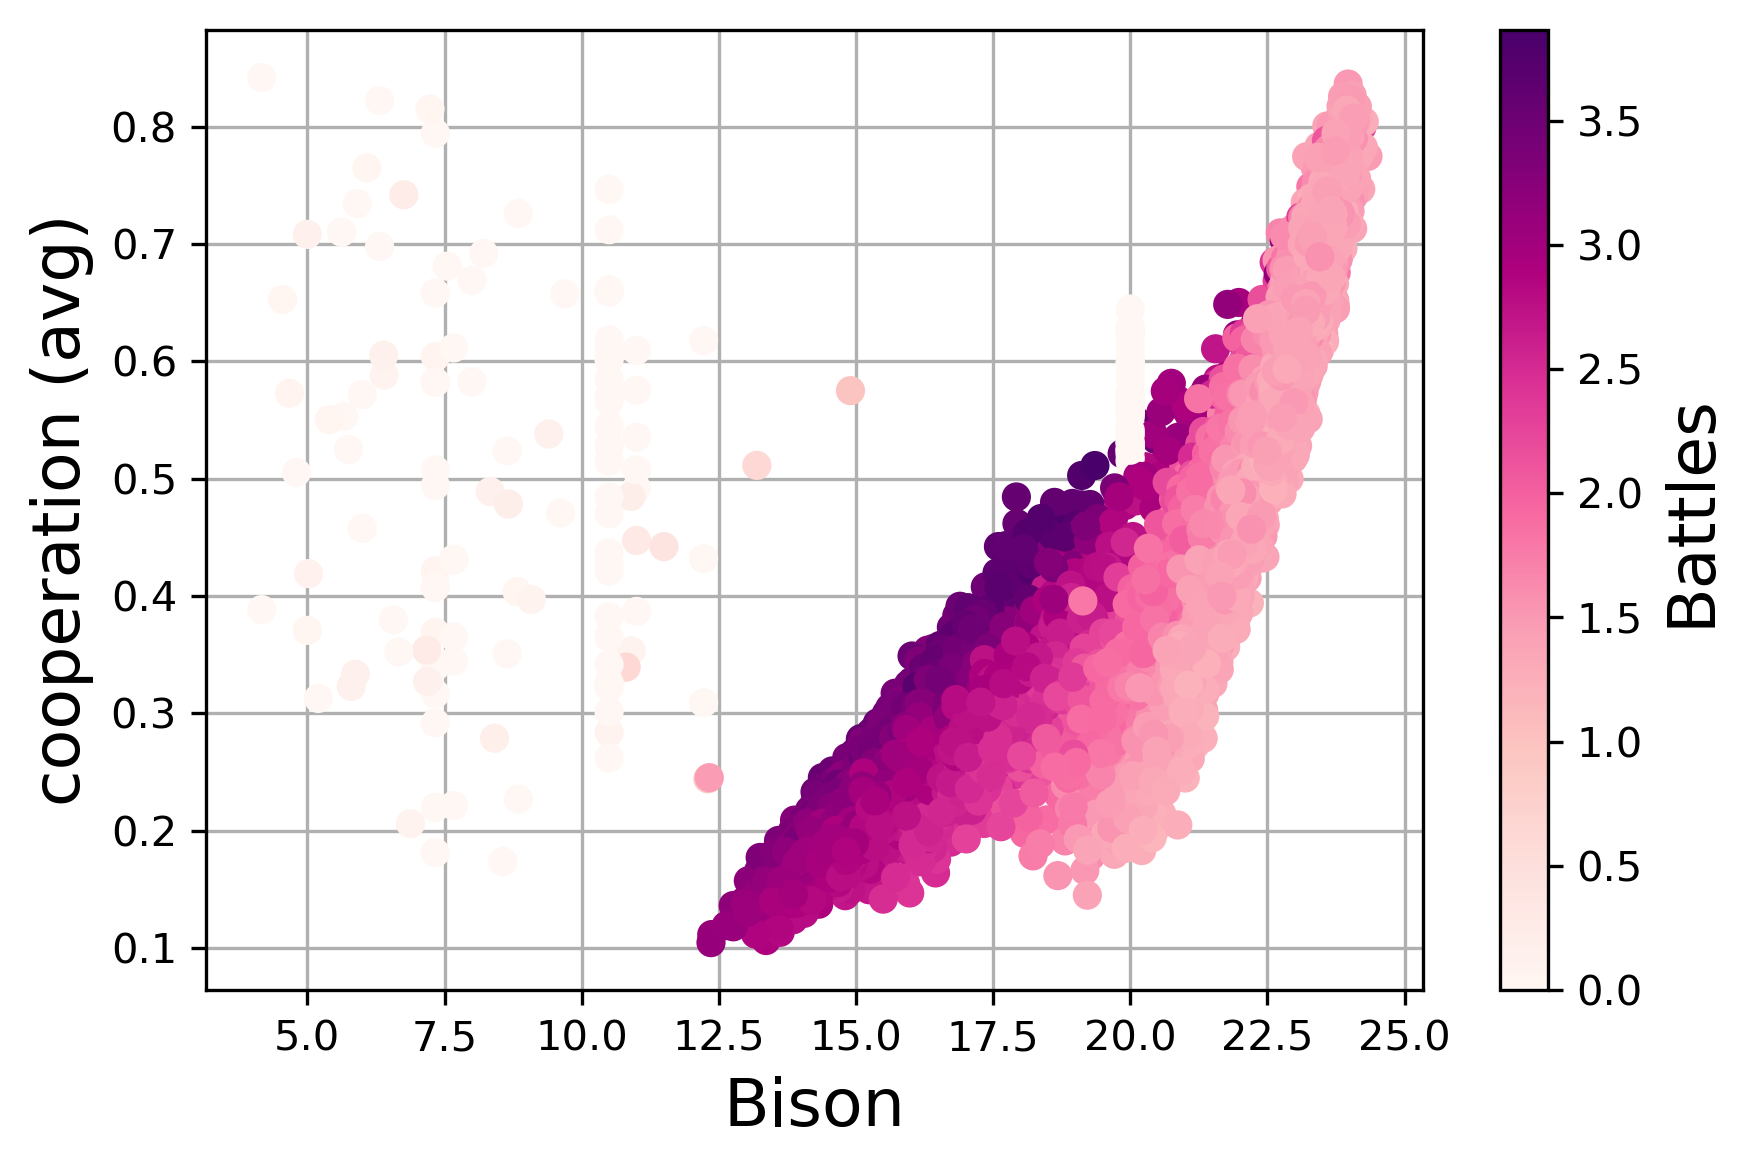

In [36]:
data_names = list(avg_per_run.columns)
plot_scatter_avg(params, avg_per_run, vx=1, vy=3, vc=5, save_fig=False)

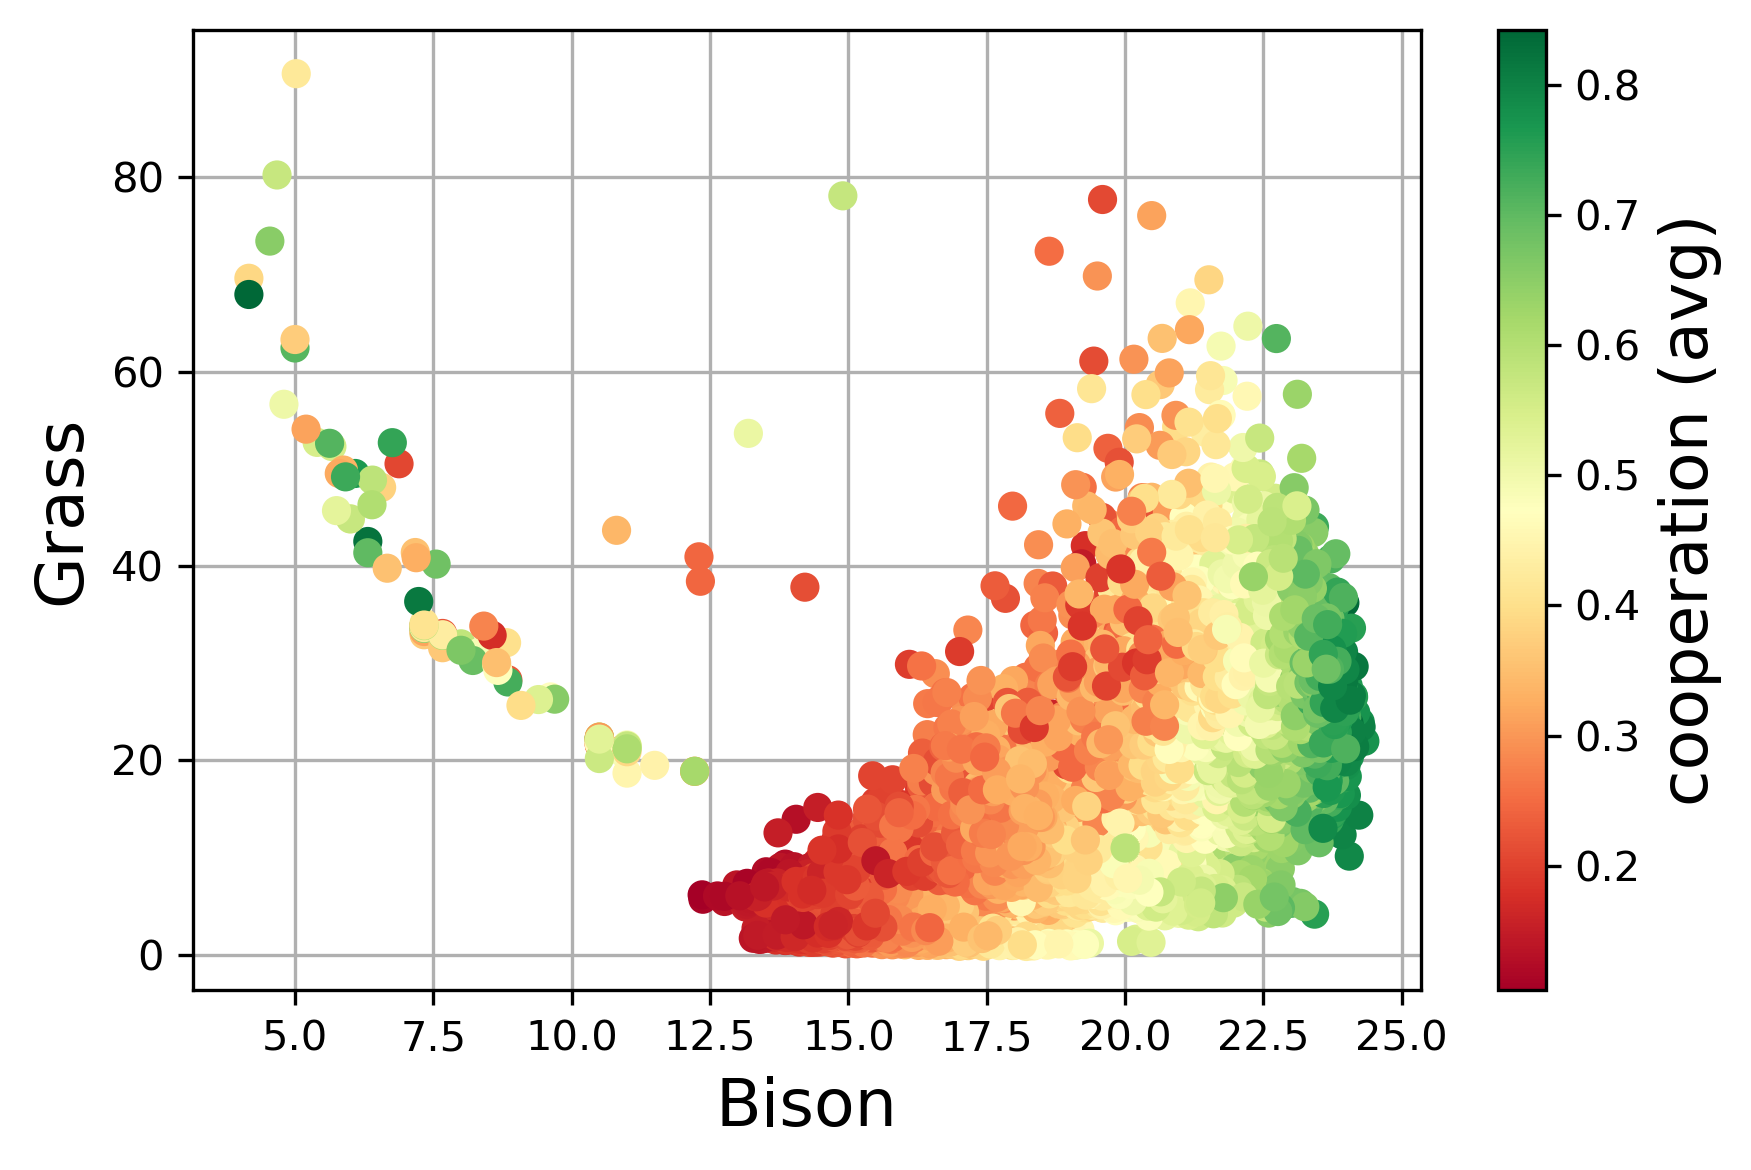

In [37]:
plot_scatter_avg(params, avg_per_run, vx=1, vy=2, vc=3, save_fig=False)

## AVERAGES PER INPUT COMBO

In [38]:
avg_per_param = create_avg_per_param(avg_per_run, variable_params)
avg_per_param.head()

,Bison,Grass,cooperation (avg),cooperation (std),Battles,sight,grass_spread,movement_weight_fights
0,16.349071,8.896746,0.346725,0.167014,2.295352,1,0.5,0.0
1,16.174100,8.228982,0.330695,0.155134,2.505030,1,0.5,0.2
2,15.928516,6.507682,0.292346,0.142339,2.671501,1,0.5,0.4
3,15.355140,8.320199,0.289331,0.141095,2.576679,1,0.5,0.6
4,16.265952,7.691622,0.270147,0.136405,2.436985,1,0.5,0.8


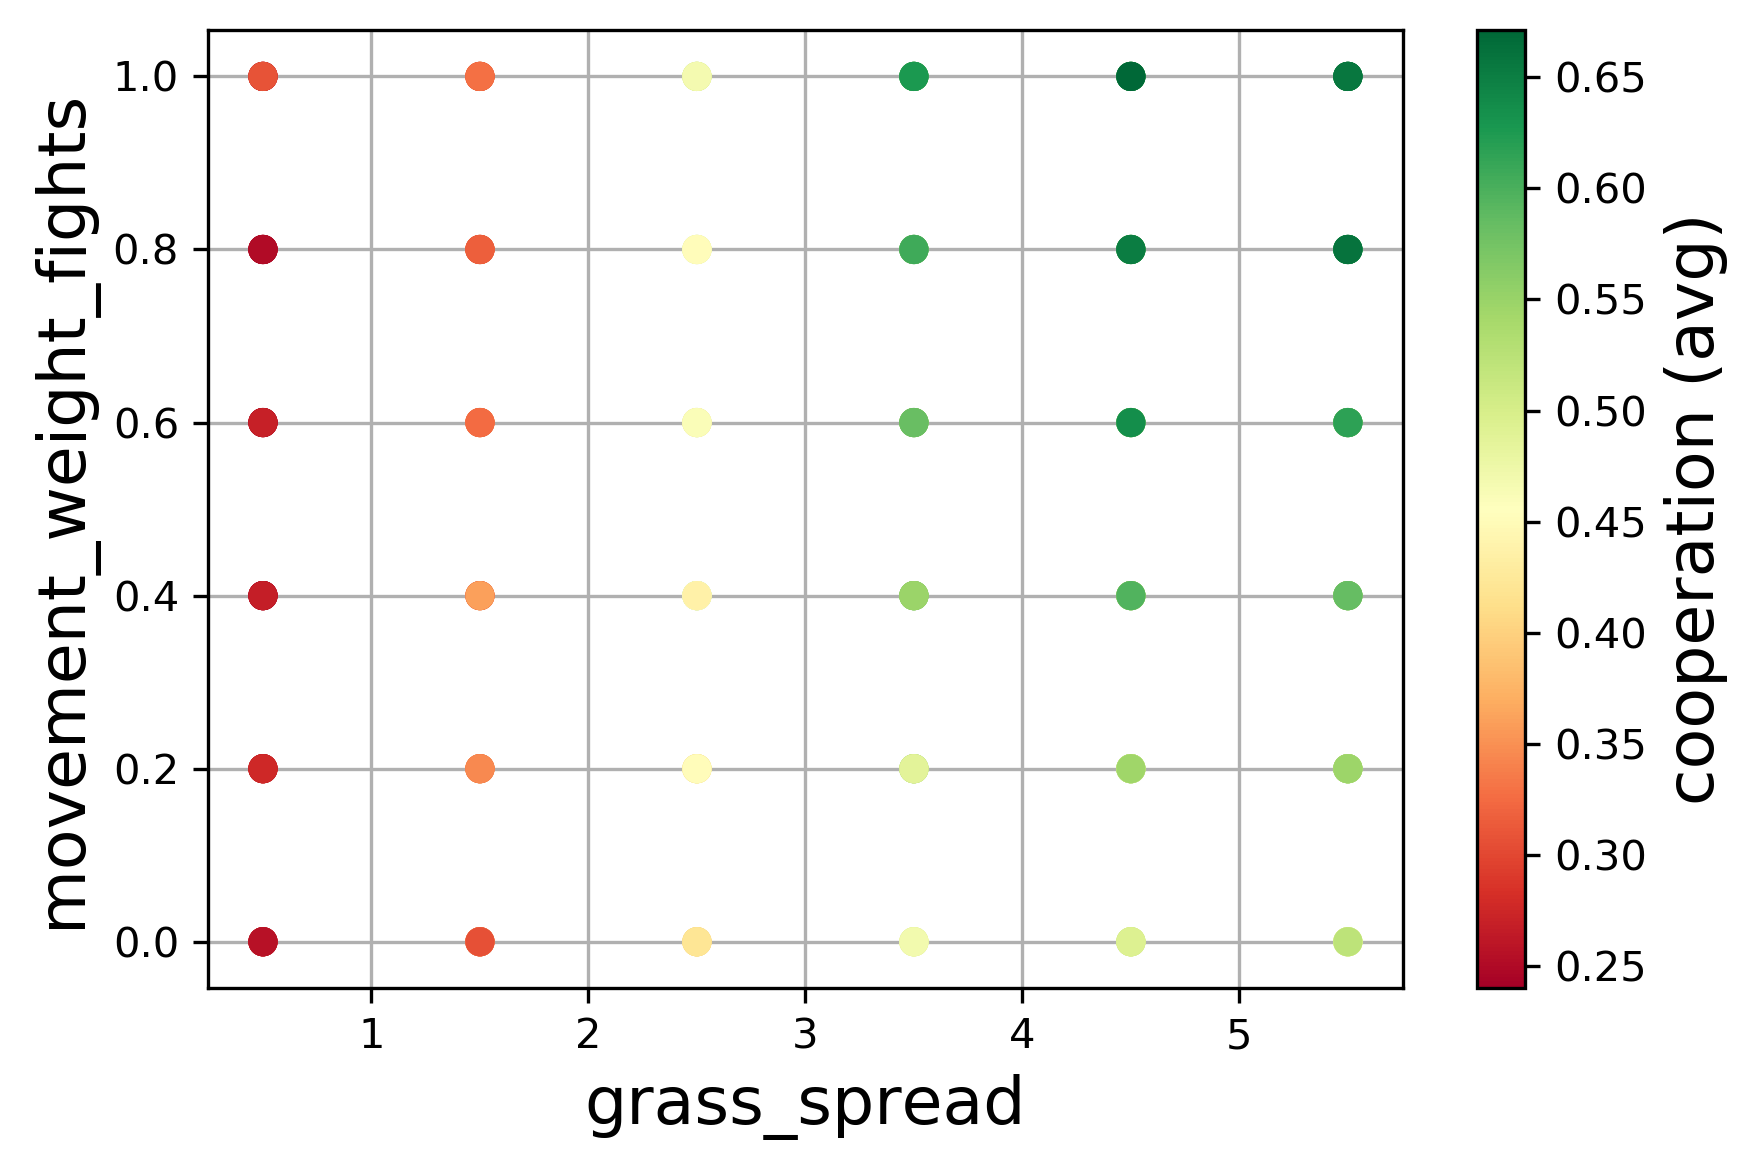

In [40]:
plot_scatter_avg(params, avg_per_param, vx=7, vy=8, vc=3, save_fig=False)

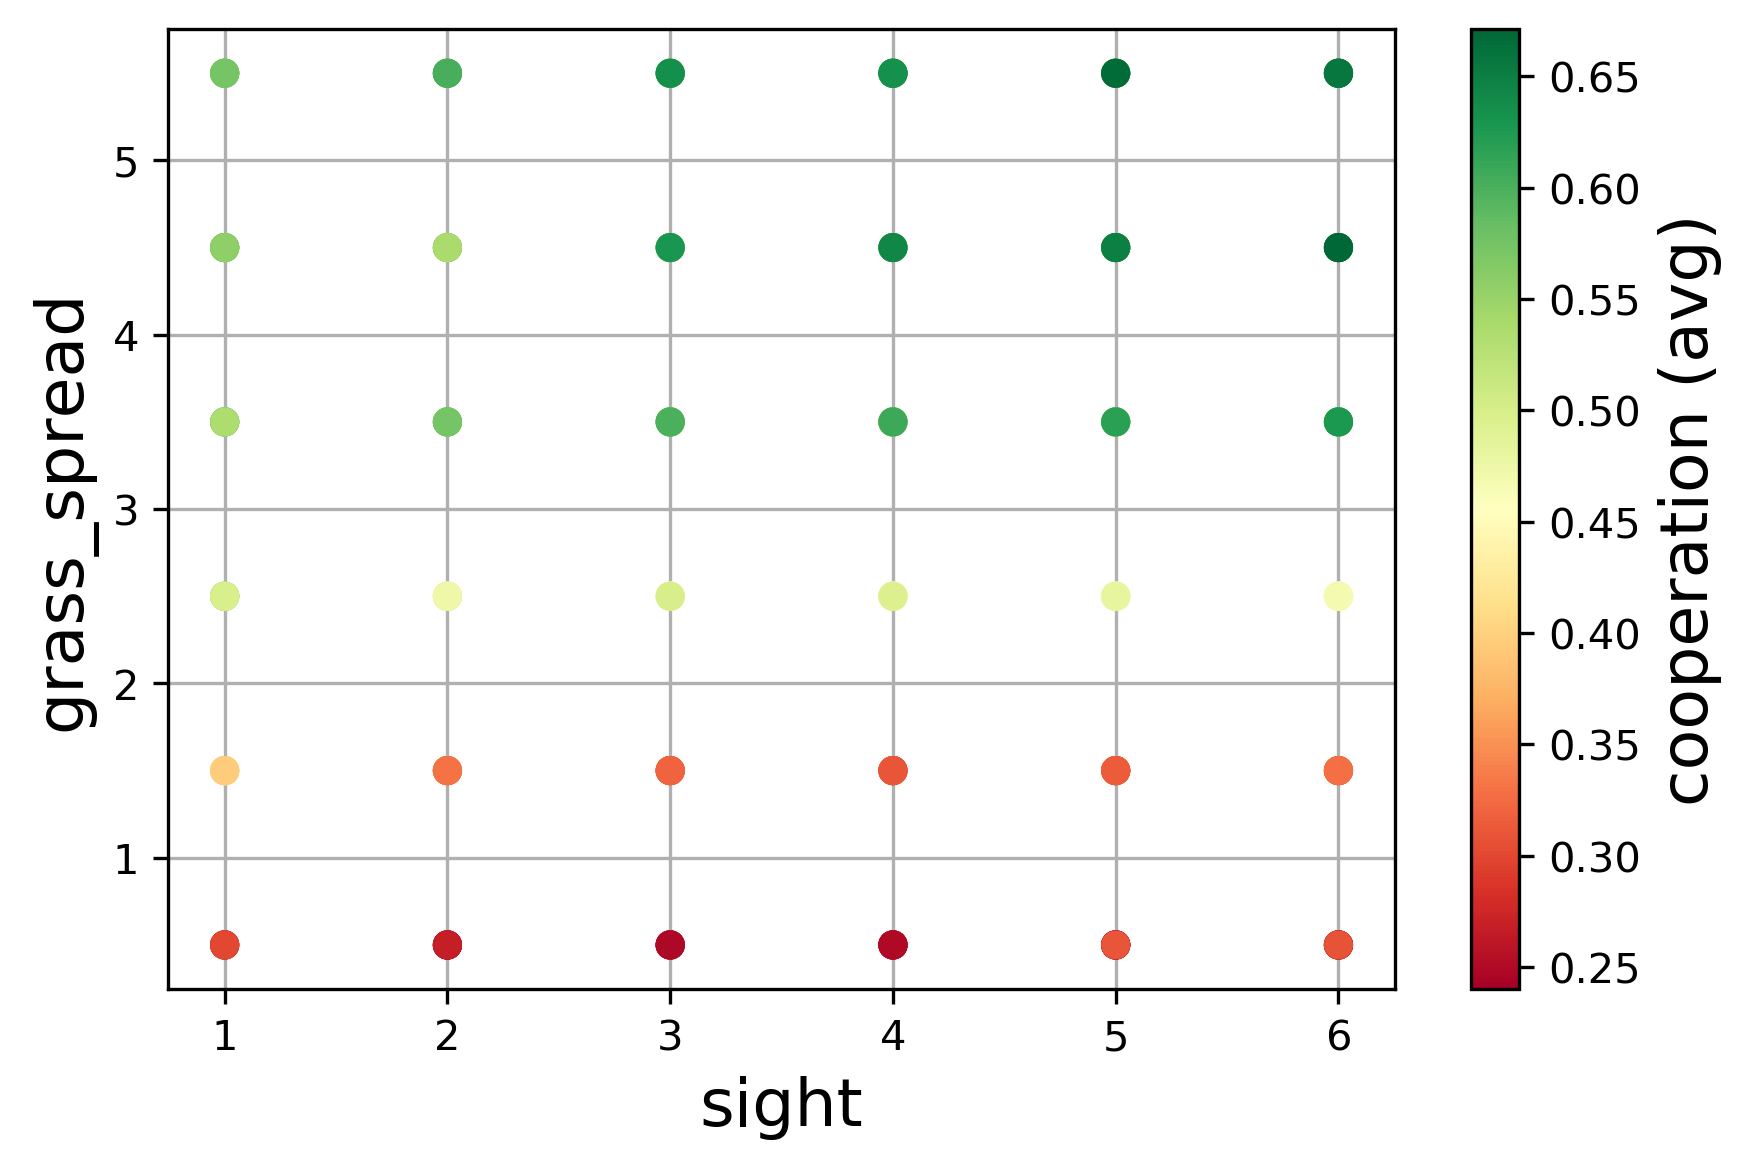

In [41]:
plot_scatter_avg(params, avg_per_param, vx=6, vy=7, vc=3, save_fig=False)

### AVERAGES PER INPUT COMBO: FIX ONE PARAMETER

In [69]:
grass_spread = 5.5
sight = 4
movement_weight_fights = 0.4
avg_gs_fixed = avg_per_param[avg_per_param['grass_spread']==grass_spread]
avg_si_fixed = avg_per_param[avg_per_param['sight']==sight]
avg_mwf_fixed = avg_per_param[avg_per_param['movement_weight_fights']==movement_weight_fights]
avg_mwf_fixed.head()

,Bison,Grass,cooperation (avg),cooperation (std),Battles,sight,grass_spread,movement_weight_fights
2,15.928516,6.507682,0.292346,0.142339,2.671501,1,0.5,0.4
8,20.104890,9.446056,0.463196,0.164992,2.875369,1,1.5,0.4
14,22.468982,17.880918,0.605356,0.167232,2.273733,1,2.5,0.4
20,22.747585,24.772495,0.609926,0.170083,1.715609,1,3.5,0.4
26,22.944152,27.095928,0.608816,0.183591,1.480439,1,4.5,0.4


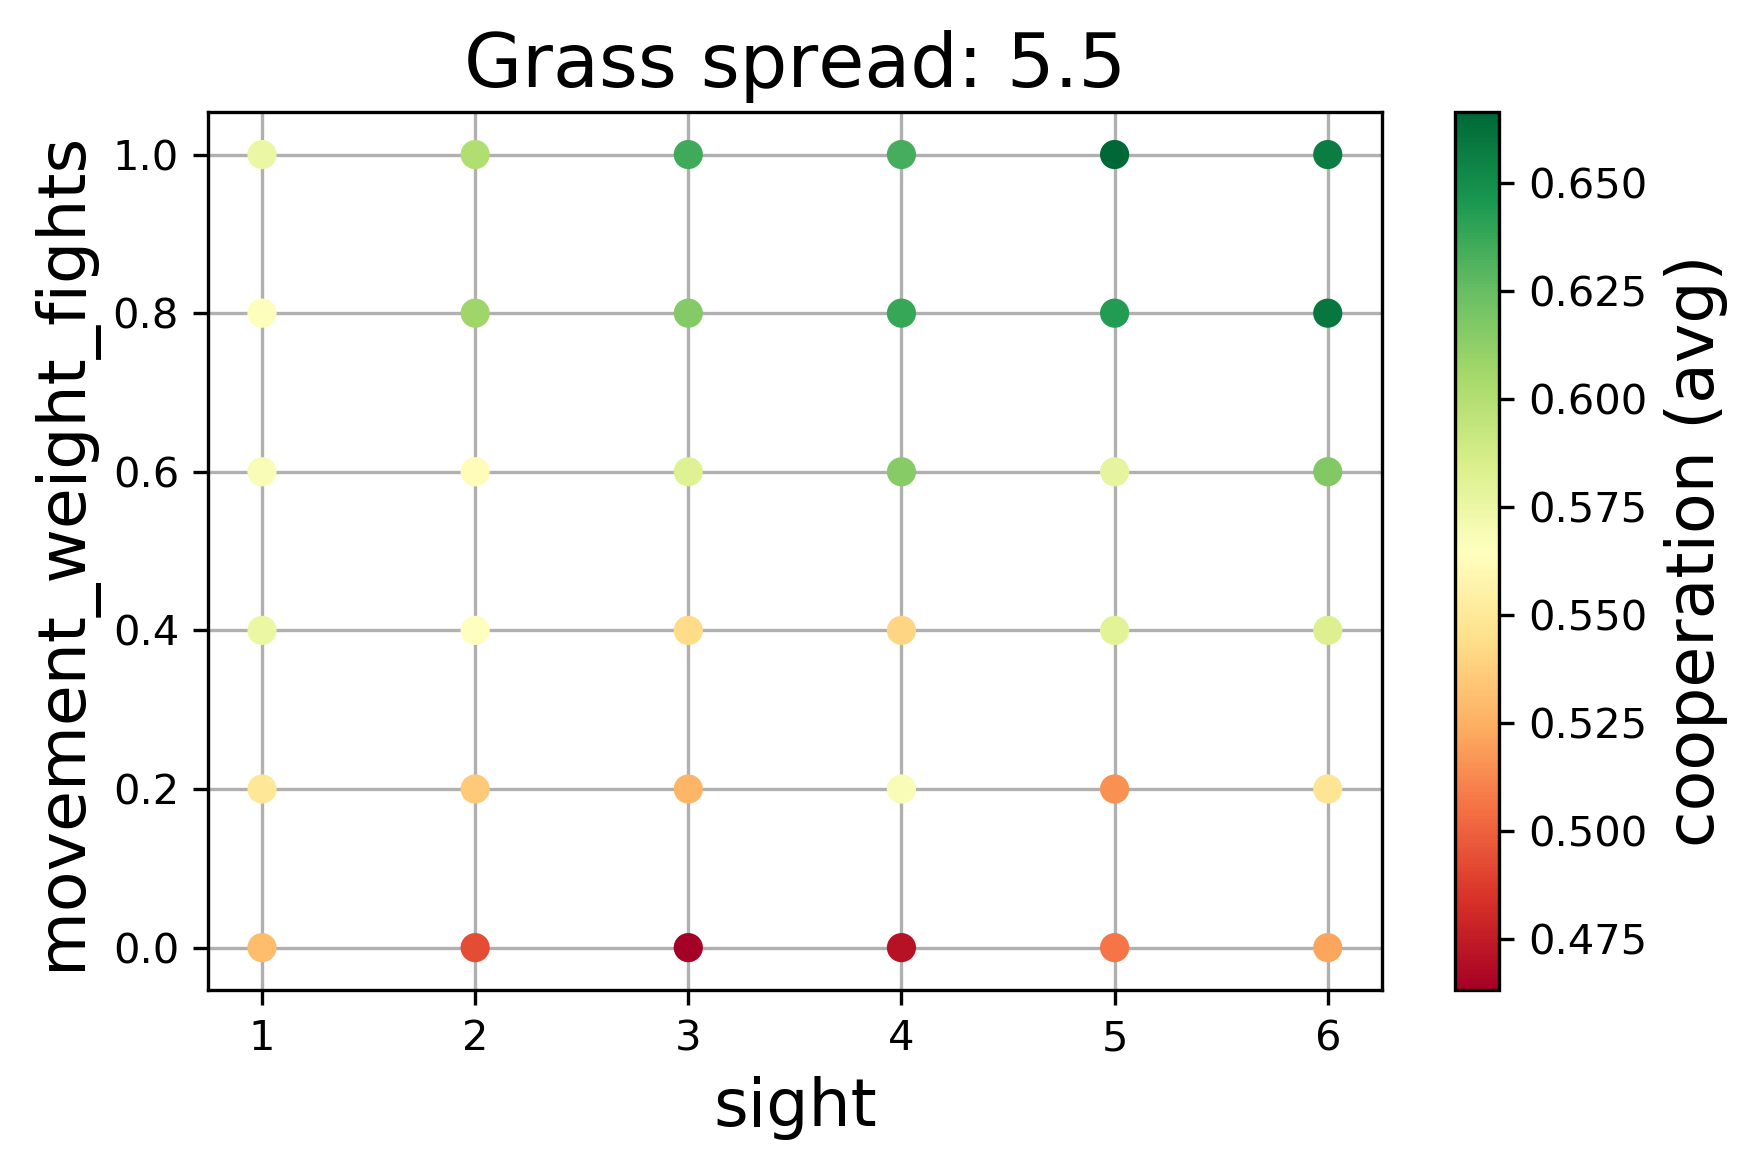

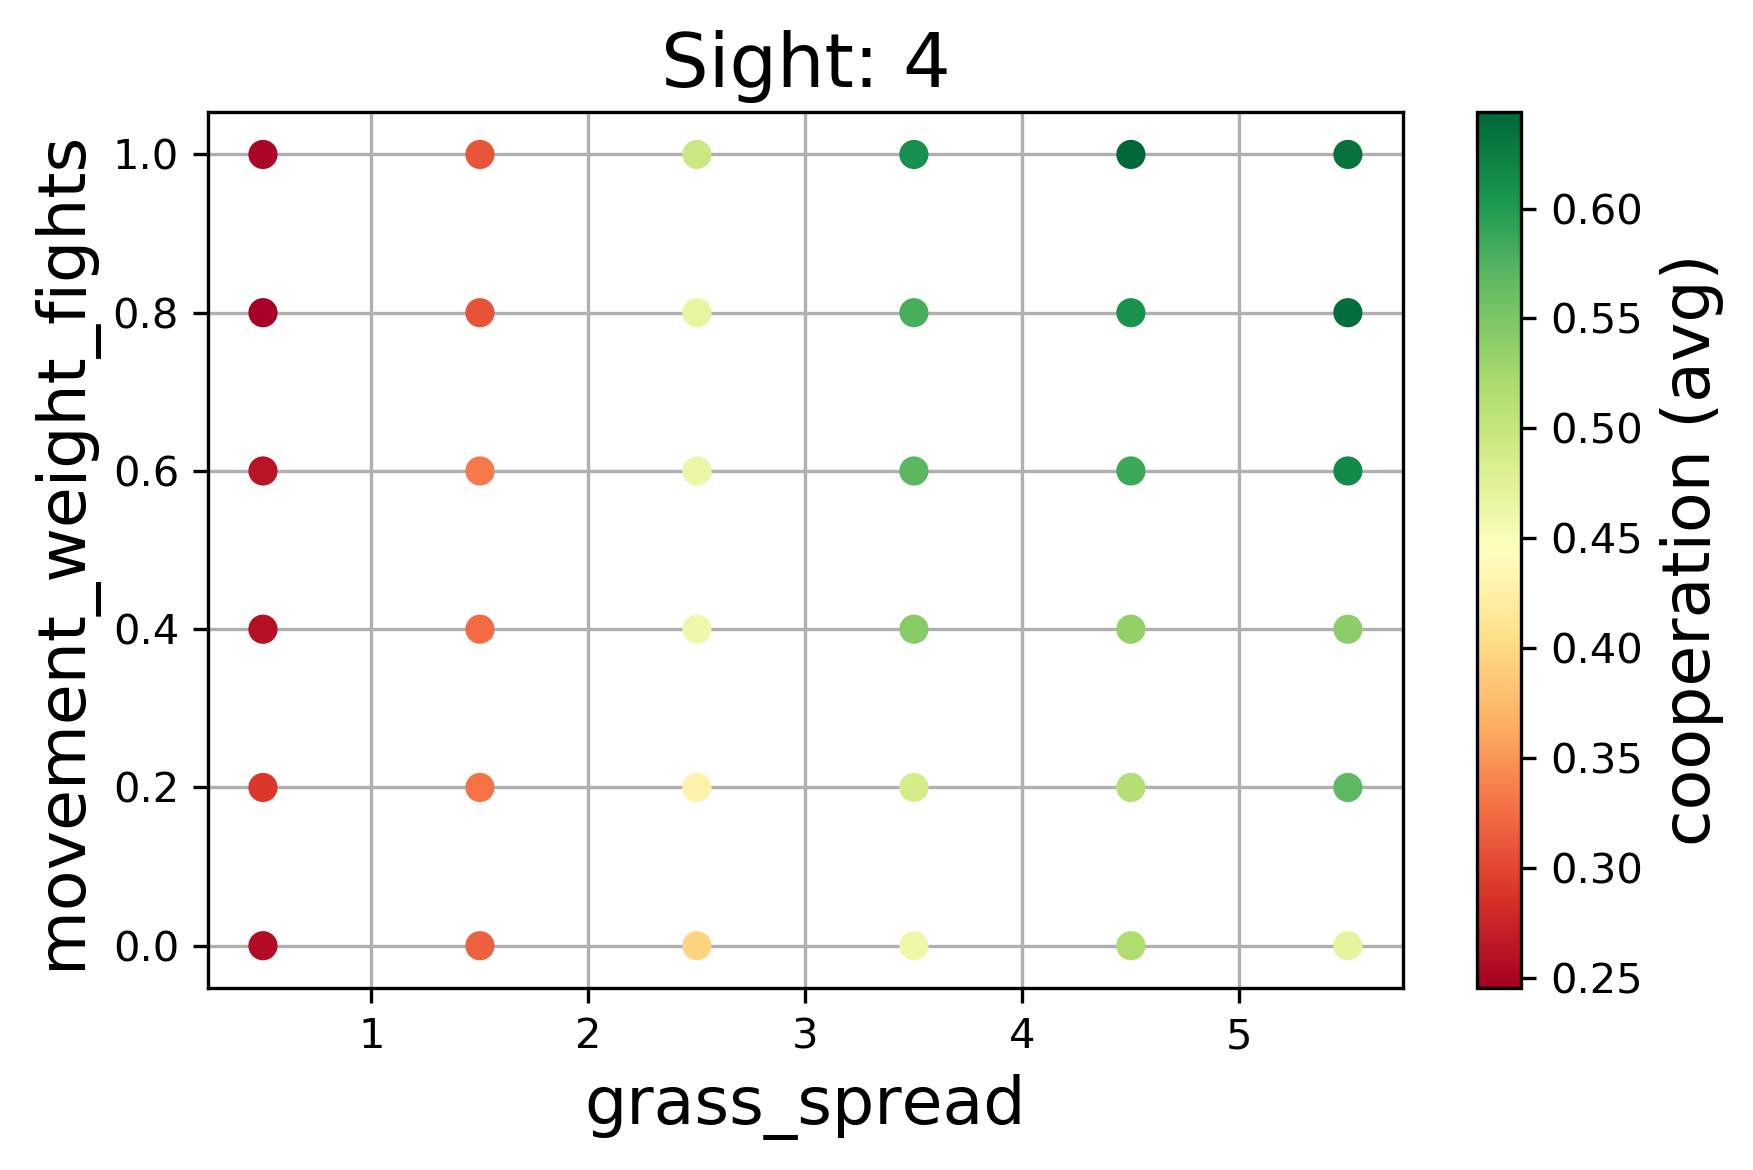

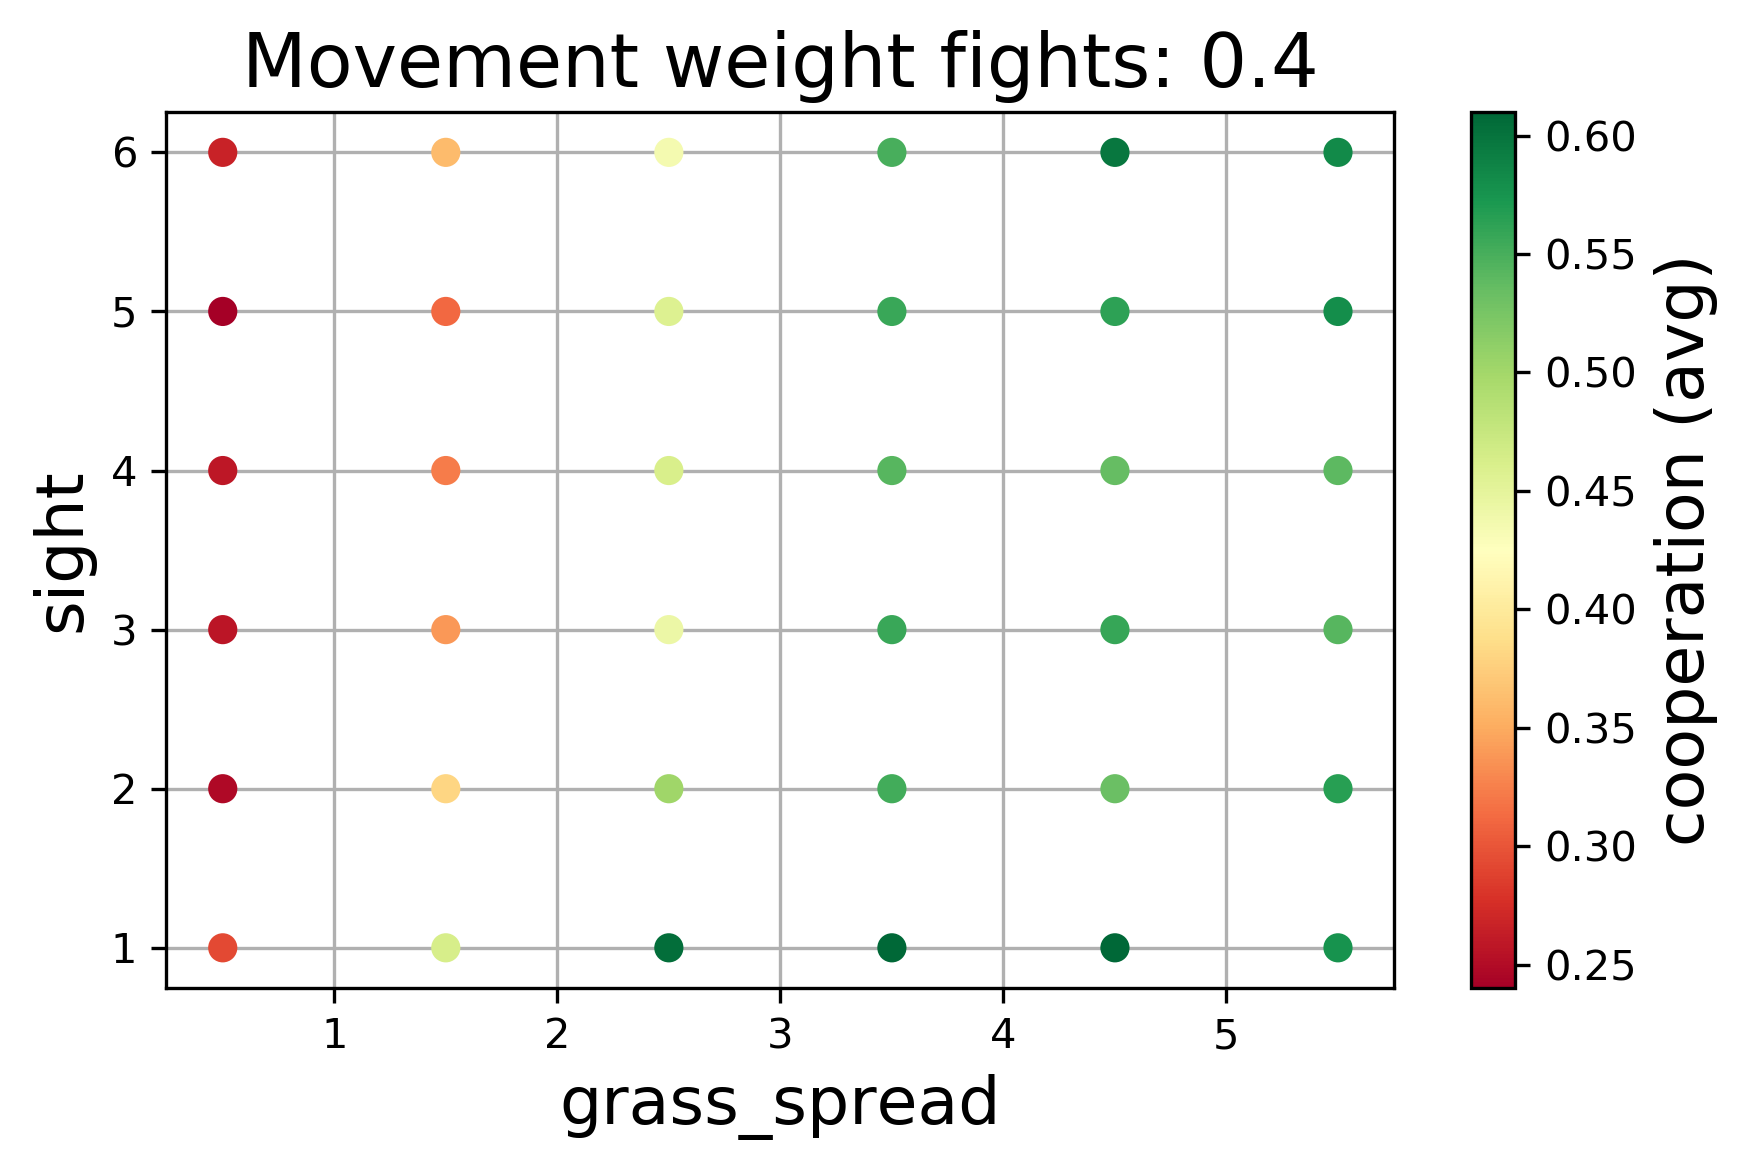

In [72]:
plot_scatter_avg(params, avg_gs_fixed, vx=6, vy=8, vc=3, save_fig=False, title=f'Grass spread: {grass_spread}')
print('\n\n\n')
plot_scatter_avg(params, avg_si_fixed, vx=7, vy=8, vc=3, save_fig=False, title=f'Sight: {sight}')
print('\n\n\n')
plot_scatter_avg(params, avg_mwf_fixed, vx=7, vy=6, vc=3, save_fig=False, title=f'Movement weight fights: {movement_weight_fights}')